In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
import numpy as np

In [ ]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Filter for only airplane (0), car (1), and truck (9)
def filter_classes(x, y, classes=[0, 1, 9]):
    indices = np.isin(y.reshape(-1), classes)
    x_filtered = x[indices]
    y_filtered = y[indices]

    # Re-map labels to 0, 1, 2
    label_map = {0:0, 1:1, 9:2}
    y_filtered = np.array([label_map[label[0]] for label in y_filtered])

    return x_filtered, y_filtered


In [ ]:
x_train, y_train = filter_classes(x_train, y_train)
x_test, y_test = filter_classes(x_test, y_test)


In [ ]:
x_train = x_train[:8000]
y_train = y_train[:8000]
x_test = x_test[:2000]
y_test = y_test[:2000]

In [ ]:
x_train.shape

(8000, 32, 32, 3)

In [ ]:
x_test.shape

(2000, 32, 32, 3)

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)


In [ ]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Create generators
batch_size = 32
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)
valid_generator = test_datagen.flow(x_test, y_test, batch_size=batch_size)


In [ ]:
# Create CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,907 (1.36 MB)

 Trainable params: 355,907 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // batch_size,
    epochs=50,
    validation_data=valid_generator,
    validation_steps=len(x_test) // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - acc: 0.5055 - loss: 0.9793 - val_acc: 0.6890 - val_loss: 0.7376
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - acc: 0.6732 - loss: 0.7462 - val_acc: 0.7681 - val_loss: 0.5766
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - acc: 0.7286 - loss: 0.6448 - val_acc: 0.7802 - val_loss: 0.5412
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - acc: 0.7629 - loss: 0.5714 - val_acc: 0.8155 - val_loss: 0.4564
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - acc: 0.7770 - loss: 0.5348 - val_acc: 0.8301 - val_loss: 0.4182
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - acc: 0.7936 - loss: 0.5129 - val_acc: 0.8528 - val_loss: 0.3692
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - acc: 0.8087 - loss: 0.4796 - val_acc: 0.8518 - val_loss: 0.3634
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 63ms/step - acc: 0.8217 - loss: 0.4480 - val_acc: 0.8700 - val_loss: 0.3310
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

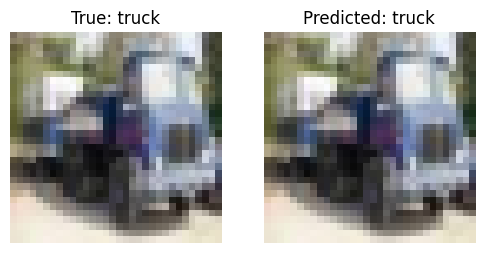

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

label_names = ['airplane', 'car', 'truck']

index = 9
image = x_test[index]
true_label = np.argmax(y_test[index])

img = image / 255.0
img_input = np.expand_dims(img, axis=0)

prediction = model.predict(img_input)
predicted_label = np.argmax(prediction)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].imshow(img)
axes[0].set_title(f"True: {label_names[true_label]}")
axes[0].axis('off')
axes[1].imshow(img)
axes[1].set_title(f"Predicted: {label_names[predicted_label]}")
axes[1].axis('off')


In [ ]:
plt.tight_layout()
plt.show()
print("Prediction probabilities:")
for i, prob in enumerate(prediction[0]):
    print(f"{label_names[i]}: {prob:.4f}")

<Figure size 640x480 with 0 Axes>

Prediction probabilities:
airplane: 0.0000
car: 0.0006
truck: 0.9994
